<a href="https://colab.research.google.com/github/RounakMishra9905/DataScienceWinterProject-2023-Rounak-Mishra-/blob/main/230876_Rounak%20Mishra/Assignment_2/Assignment_2(Rounak_Mishra).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from math import exp
import operator

In [3]:
#Question 1:

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
#Logistic regression from scratch[without normalisation]:
plt.rcParams["figure.figsize"] = (10, 6)
data = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")

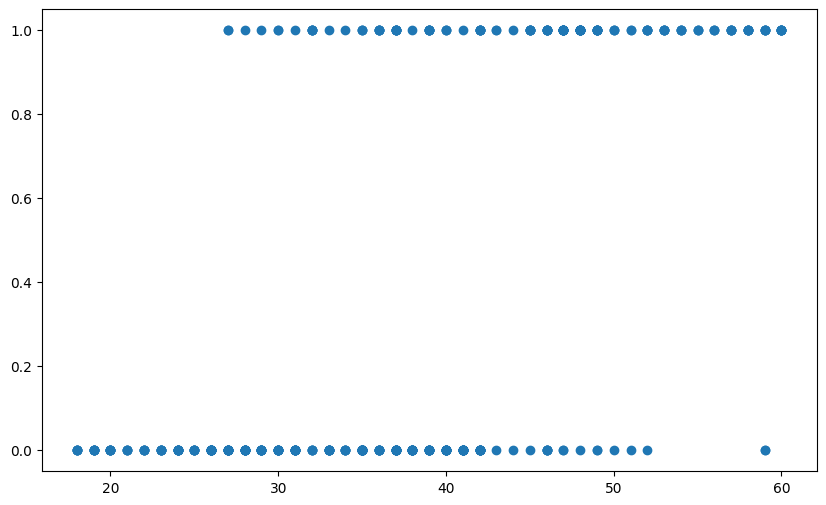

In [6]:
plt.scatter(data['Age'], data['Purchased'])
plt.show()
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.30)
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])
def logistic_regression(X, Y):
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

    return b0, b1

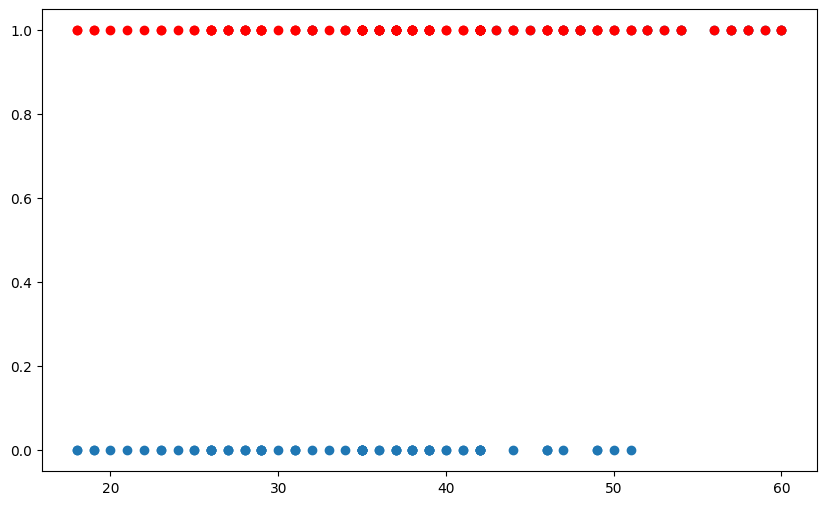

Accuracy = 0.35


In [7]:
b0, b1 = logistic_regression(X_train, y_train)
y_pred = predict(X_test, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


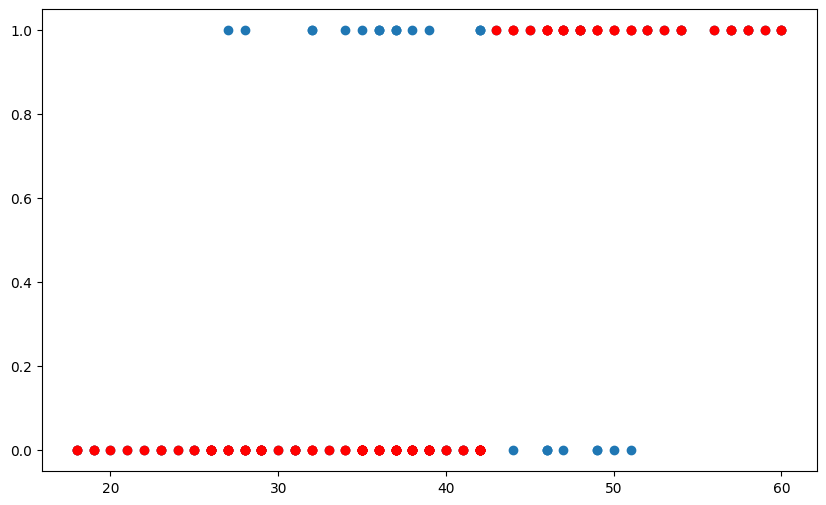

Accuracy = 0.7833333333333333


In [8]:
#Using sklearn[without normalizationj]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")


In [9]:
#Logistic regression from scratch[with normalisation]:
plt.rcParams["figure.figsize"] = (10, 6)
data = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")

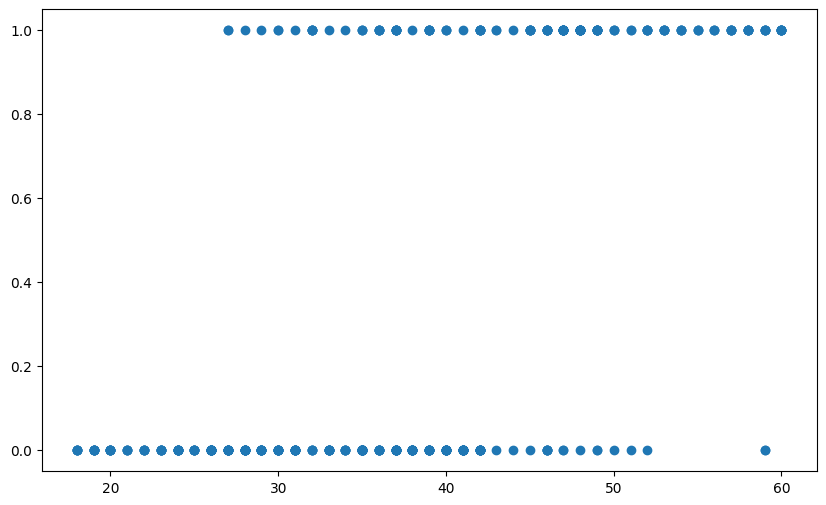

In [10]:
plt.scatter(data['Age'], data['Purchased'])
plt.show()
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.30)
def normalize(X):
    return X - X.mean()
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])
def logistic_regression(X, Y):

    X = normalize(X)
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

    return b0, b1





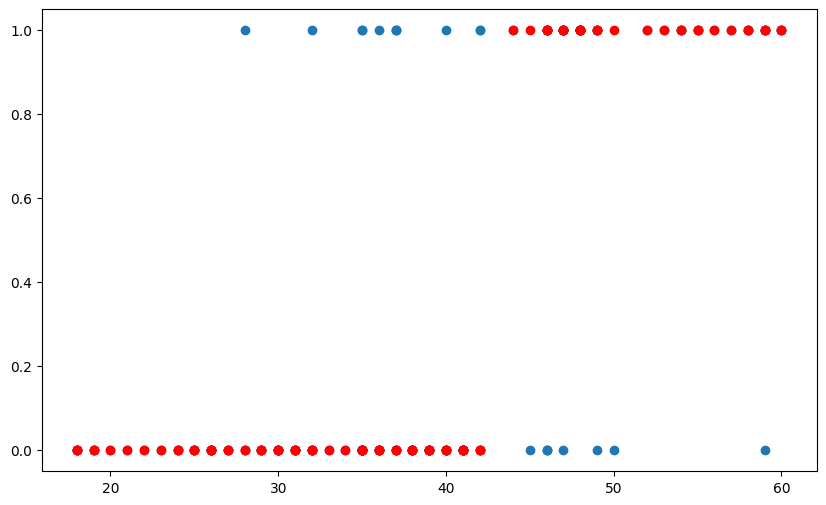

Accuracy = 0.8416666666666667


In [11]:
b0, b1 = logistic_regression(X_train, y_train)


X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


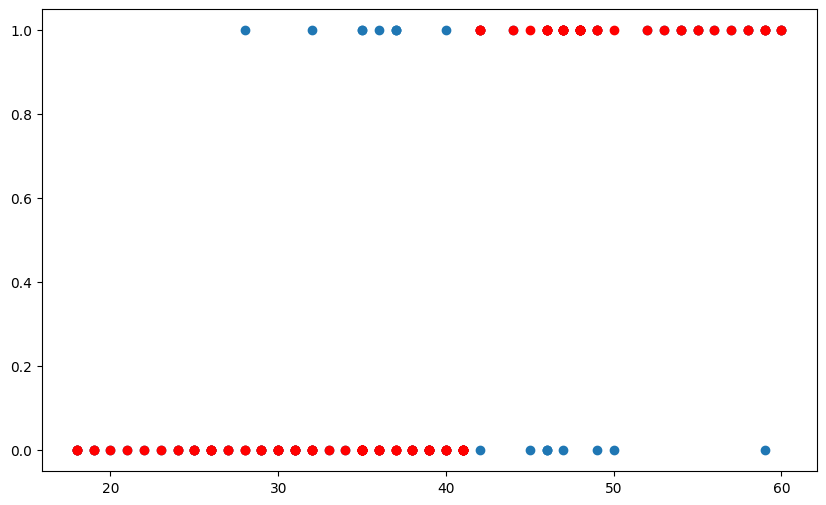

Accuracy = 0.85


In [12]:
#Using sklearn[with normalizationj]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")

In [13]:
#Logistic regression from scratch[with standardization]:
plt.rcParams["figure.figsize"] = (10, 6)



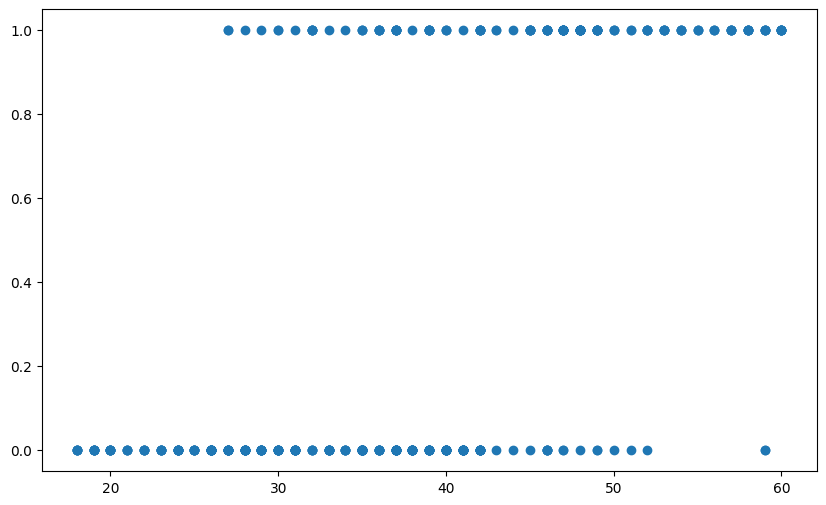

In [14]:
plt.scatter(data['Age'], data['Purchased'])
plt.show()
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.30)
def standardize(X):
    mean_X = np.mean(X)
    std_X = np.std(X)
    X_std = (X - mean_X) / std_X
    return X_std
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])
def logistic_regression(X, Y):

    X = standardize(X)
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

    return b0, b1


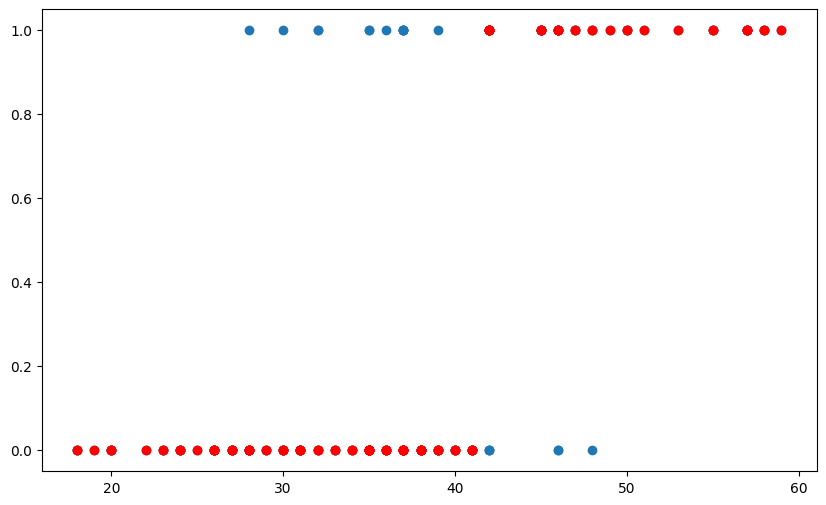

Accuracy = 0.8416666666666667


In [15]:
b0, b1 = logistic_regression(X_train, y_train)


X_test_norm = standardize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


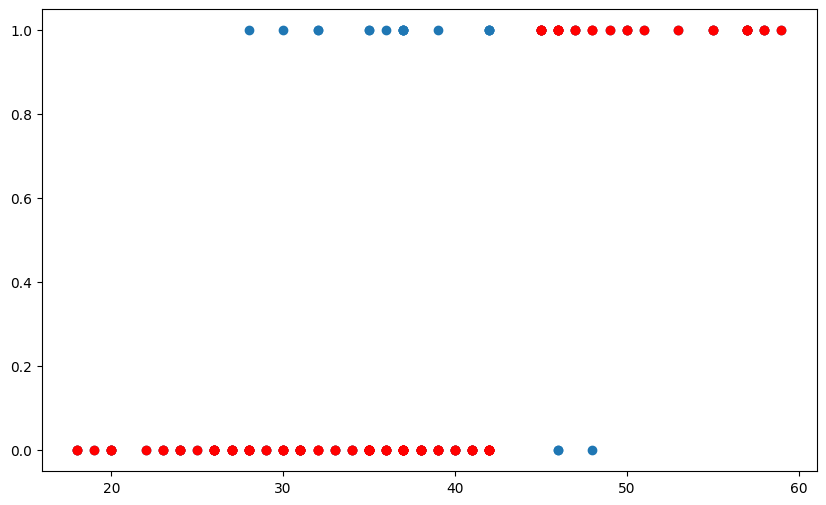

Accuracy = 0.8333333333333334


In [16]:
#Logistic regression using sklearn[with standardization]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test_std = scaler.transform(X_test.values.reshape(-1, 1))
lr_model = LogisticRegression()
lr_model.fit(X_train_std, y_train.values.reshape(-1, 1))
y_pred_sk = lr_model.predict(X_test_std)
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()
accuracy = lr_model.score(X_test_std, y_test.values.reshape(-1, 1))
print(f"Accuracy = {accuracy}")


In [17]:
#Question 2:

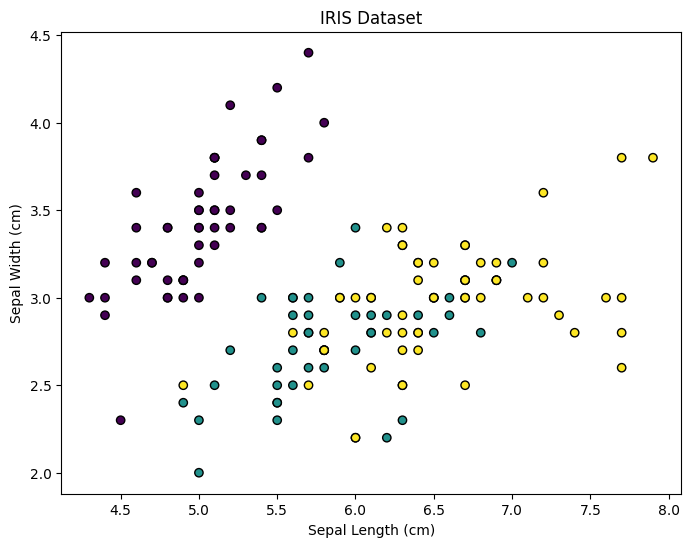

In [19]:
#Using sklearn
from sklearn.preprocessing import LabelEncoder
file_path = '/content/drive/MyDrive/Iris.csv'
iris_df = pd.read_csv(file_path)
label_encoder = LabelEncoder()
iris_df['species'] = label_encoder.fit_transform(iris_df['Species'])
X = iris_df.iloc[:, 1:5].values
y = iris_df['species'].values
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('IRIS Dataset')
plt.show()

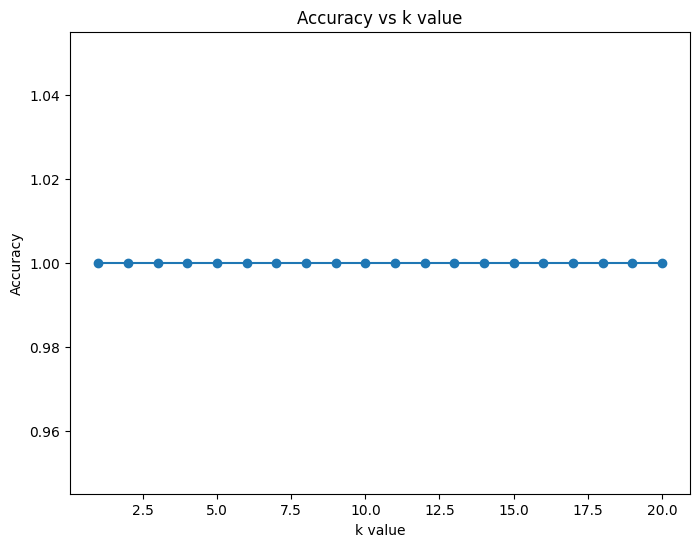

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
k_values = list(range(1, 21))
accuracy_scores = [accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)) for k in k_values]
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k value')
plt.show()


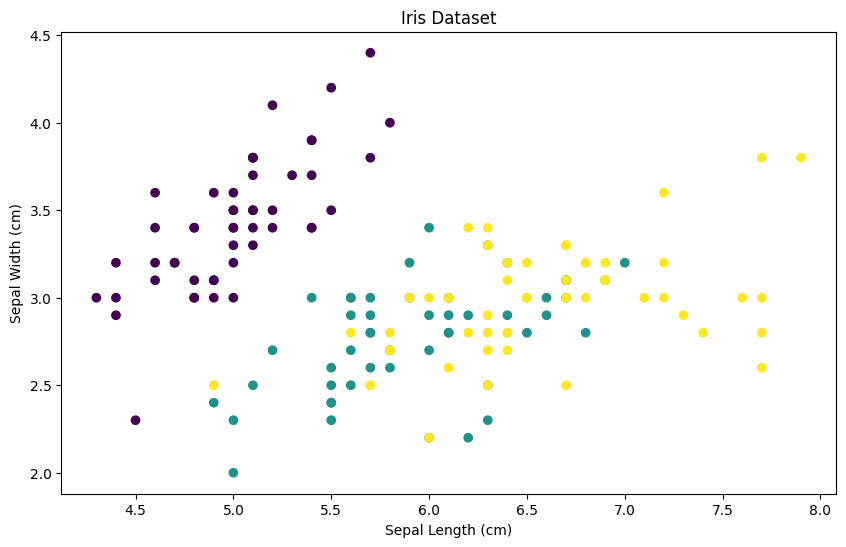

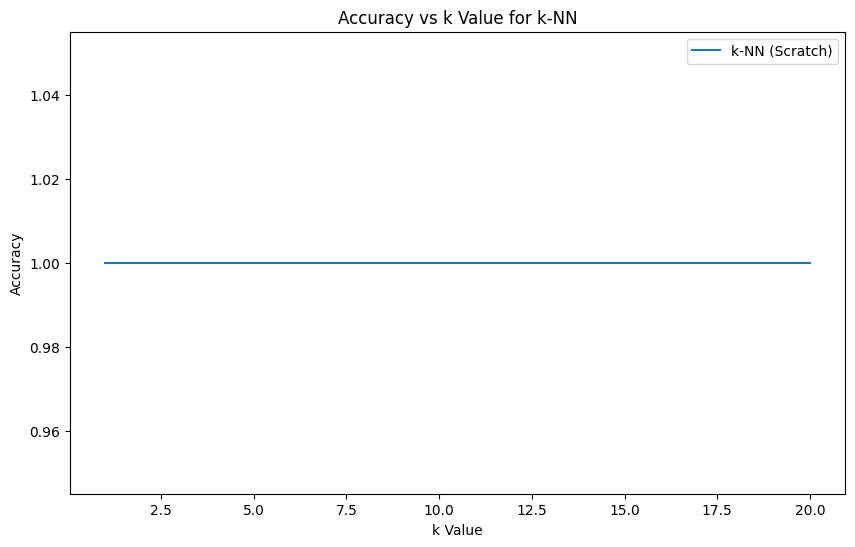

In [36]:
#KNN from Scratch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset')
plt.show()


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def k_nearest_neighbors(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_neighbors_indices = np.argsort(distances)[:k]
    k_neighbor_labels = [y_train[i] for i in k_neighbors_indices]
    most_common = np.bincount(k_neighbor_labels).argmax()
    return most_common

def predict_knn(X_train, y_train, X_test, k):
    predictions = [k_nearest_neighbors(X_train, y_train, x_test, k) for x_test in X_test]
    return predictions


k_values = range(1, 21)
accuracy_scratch = []

for k in k_values:
    y_pred_scratch = predict_knn(X_train, y_train, X_test, k)
    accuracy_scratch.append(accuracy_score(y_test, y_pred_scratch))





plt.plot(k_values, accuracy_scratch, label='k-NN (Scratch)')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k Value for k-NN')
plt.legend()
plt.show()